# Importing Libraries and Dataset Preprocessing

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import string
import time

No of Images : 1774
Characters :  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«
No of chars : 82


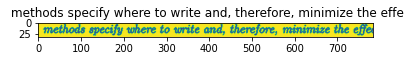

In [5]:
from PIL import Image

text_file=open(r"UsedSentences.txt","r")

details=[]
outputs=[]
names=[]
for line in text_file:
    a=line.split('#')
    outputs.append(a[1].strip('\n'))
    details.append(a[0])

for detail in details:
    a=detail.split(' ')
    names.append(a[0])
X=[]

for name in names:
    img=Image.open('CleanedImages/Encoder_Clean_Renamed/'+name+'.png','r')
    img = img.resize((784,32), Image.ANTIALIAS)
    img=np.asarray(img)
    img=img[:,:,0]
    X.append(img)

X=np.asarray(X)
plt.imshow(X[42])
plt.title(outputs[42])
print("No of Images :",X.shape[0])

symbols = " "+string.ascii_lowercase + string.ascii_uppercase+"0123456789.,*&!@~():`^]¢‘;|-«"
print("Characters :",symbols)
print("No of chars :",len(symbols))

# print(os.listdir('../input/linesdata/data/sentences/s01/'))



In [8]:
Y=np.zeros(shape=(len(outputs),98,len(symbols)))
for example_no,name in enumerate(outputs):
    for letter_no,letter in enumerate(name):
        try:
            Y[example_no][letter_no][symbols.index(letter)]=1
        except:
            print(letter,end=" ")

In [9]:
X=np.reshape(X,(X.shape[0],X.shape[1],X.shape[2],1))
print("Shape of X is :",X.shape)

Shape of X is : (1774, 32, 784, 1)


# Model Architecture and Training

In [10]:
# Neural Network Model 
# Try Removing Batch Normalisation and see how the performance decreases.
def OCRModel():
    image=keras.layers.Input((32,784,1))
    conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
    mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv1)
    conv2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(mp1)
    mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
    conv3=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(mp2)
    mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv3)
    conv4=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(mp3)
    mp4=keras.layers.MaxPooling2D((2,1),padding='same')(conv4)
    conv5=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp4)
    mp5=keras.layers.MaxPooling2D((2,1),padding='same')(conv5)
    conv6=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp5)
    # mp6=keras.layers.MaxPooling2D((1,3),padding='same')(conv6)
    bn=keras.layers.BatchNormalization()(conv6)
    sq=keras.backend.squeeze(bn,axis=1)

    rn1=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(sq)
    rn2=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(rn1)

    exd=keras.backend.expand_dims(rn2,axis=2)
    maping=keras.layers.Conv2D(len(symbols),(2,2),activation='relu',padding='same')(exd)
    maping=keras.backend.squeeze(maping,axis=2)
    maping = tf.keras.layers.Softmax()(maping)

    # bn = keras.layers.BatchNormalization()(conv3)
    model=keras.Model(image,maping)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

In [14]:
%%time
from keras.utils.vis_utils import plot_model
OCR=OCRModel()
OCR.fit(X,Y,epochs=50)

Epoch 1/50
56/56 [==============================] - 65s 1s/step - loss: 1.6101
Epoch 2/50
56/56 [==============================] - 63s 1s/step - loss: 1.5038
Epoch 3/50
56/56 [==============================] - 62s 1s/step - loss: 1.4894
Epoch 4/50
56/56 [==============================] - 62s 1s/step - loss: 1.4706
Epoch 5/50
56/56 [==============================] - 64s 1s/step - loss: 1.4388
Epoch 6/50
56/56 [==============================] - 64s 1s/step - loss: 1.3928
Epoch 7/50
56/56 [==============================] - 64s 1s/step - loss: 1.3336
Epoch 8/50
56/56 [==============================] - 63s 1s/step - loss: 1.2297
Epoch 9/50
56/56 [==============================] - 64s 1s/step - loss: 1.1352
Epoch 10/50
56/56 [==============================] - 63s 1s/step - loss: 1.0204
Epoch 11/50
56/56 [==============================] - 63s 1s/step - loss: 0.8765
Epoch 12/50
56/56 [==============================] - 64s 1s/step - loss: 0.6912
Epoch 13/50
56/56 [==============================

# Saving Model and Demo testing

In [15]:
#plot_model(OCR, to_file='plot.png', show_shapes=True, show_layer_names=True)
OCR.save('OCR.h5')

98
predicted: filter that replaces the pixel values with the neighb

Orignal:  filter that replaces the pixel values with the neighb


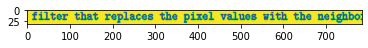

In [17]:
xx=OCR.predict(X)
index=466
c=""
print(len(xx[0]))
for i in range(len(xx[0])):
    c=c+(symbols[np.argmax(xx[index][i])])
print("predicted:",c.strip())
print("\nOrignal:",outputs[index])
plt.imshow(X[index][:,:,0])
plt.show()

In [25]:
!pip install --upgrade coremltools
import coremltools as ct
model = ct.convert('OCR.h5')

Requirement already up-to-date: coremltools in /Users/lord/opt/anaconda3/envs/Localytee/lib/python3.8/site-packages (4.0)


Converting Frontend ==> MIL Ops: 100%|██████████| 13/13 [00:00<00:00, 22337.55 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 36/36 [00:00<00:00, 3520.43 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 13/13 [00:00<00:00, 17287.87 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 13/13 [00:00<00:00, 14804.77 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 36/36 [00:00<00:00, 3574.61 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 13/13 [00:00<00:00, 16127.17 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 36/36 [00:00<00:00, 3404.54 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 13/13 [00:00<00:00, 17151.92 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 36/36 [00:00<00:00, 3372.08 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 13/13 [00:00<00:00, 16881.10 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████| 36/36 [00:00<00:00, 3372.98 ops/s]

Converting Frontend ==> MIL Ops: 100%|██████████

In [26]:
model.save("OCR-iOS.mlmodel")

In [27]:
!ls

CleanedImages      OCR TRAINING.ipynb OCR-iOS.mlmodel    Podfile
DirtyImages        OCR v2             OCR.h5             UsedSentences.txt
